In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=6)
plt.style.use('seaborn-white')


# 1. PWR

## 1.0 Reactor Data

### PWR - CLASS
#### Reactor
    - 17x17 infinite assembly
    - Neural network prediction of the k$_{inf}$
    - k$_{threshold}$ is 1.034
    - Heavy mass: 72 tons
    - Thermal power: 3 GWth
    - Loading factor: 75%
    - Irradiation time: 3 years that correspond to a burn-up closed to 34 GWd/t
#### FLM
    - 17x17 infinite assembly
    - Neural network prediction of the k$_{inf}$
    - k$_{threshold}$ is 1.034

### PWR - Tr_Evol
#### Reactor
    - Thermal_power_(GW) : 3.0
    - Electrical_power_(GW) : 1.0
    - Load_factor : 0.9
    - Core_mass_(tHM) : 72.0
    - Burn_up_(GWd/tHM) : 41
#### FLM
    - Baker \& Ross


### PWR - ANICCA
#### Reactor

    - Fuel Heavy Mass: 22.2908 t / year  from 1 GW*0.85*365.25/41 GWd/t
    - BU : 41 GWd/t (this one from the reference library, so I set this like a reference for all simulations to calculate the annual loading masses)
    - Load Factor : 85% (I changed this to be more representative)
    - Electric Power : 1.02 GWth
    - Thermal Power : 3 GWth
    - Cycle Time : 1390 EFPD
    - Core Mass : 101.7 tHM (1390*3/41… right?)

#### FLM
    - Baker \& Ross

    
### PWR - CYCLUS
#### Reactor
    - Heavy mass: 72 tons
    - Thermal power: 2.7 GWth
    - Loading factor: 100%
    - BurnUp: 41.09 GWd/t
#### FLM
    - Baker \& Ross

    

## 1.1 Loading Data files and Variable declaration
### NICO / CLASS

In [2]:
def load_class_pwr_data(fml_file = 'CLASS_CRNS_PWR/PWR_MOX_FLM.dat',  ff_file = 'CLASS_CRNS_PWR/PWR_MOX_FF.dat'):
    M_CLASS_FLM = np.loadtxt(fml_file)
    M_CLASS_FF = np.loadtxt(ff_file)
    
    total_mass = 72
    M_CLASS_FLM_BOC_FPu = M_CLASS_FLM[:,5]/total_mass
    M_CLASS_FLM_EOC_FPu = M_CLASS_FLM[:,6]/total_mass
        
    M_CLASS_FF_BOC_FPu = M_CLASS_FF[:,5]/total_mass
    M_CLASS_FF_EOC_FPu = M_CLASS_FF[:,6]/total_mass
    return M_CLASS_FLM_BOC_FPu, M_CLASS_FLM_EOC_FPu, M_CLASS_FF_BOC_FPu, M_CLASS_FF_EOC_FPu


### YVAN / ANICCA

In [3]:
def load_anica_pwr_data(fml_file = 'ANICCA_SCK/PWR_MOX_FLM',  ff_file = 'ANICCA_SCK/PWR_MOX_FF'):

    M_ANICCA_FLM_BOC = np.loadtxt( fml_file + '_BOC.dat')
    M_ANICCA_FLM_EOC = np.loadtxt( fml_file + '_EOC.dat')
    M_ANICCA_FF_BOC = np.loadtxt( ff_file + '_BOC.dat')
    M_ANICCA_FF_EOC = np.loadtxt( ff_file + '_EOC.dat')

    M_ANICCA_FLM_BOC_FPu = M_ANICCA_FLM_BOC[:,2]
    M_ANICCA_FLM_EOC_FPu = M_ANICCA_FLM_EOC[:,2]

    M_ANICCA_FF_BOC_FPu = M_ANICCA_FF_BOC[:,2]
    M_ANICCA_FF_EOC_FPu = M_ANICCA_FF_EOC[:,2]

    return M_ANICCA_FLM_BOC_FPu, M_ANICCA_FLM_EOC_FPu, M_ANICCA_FF_BOC_FPu, M_ANICCA_FF_EOC_FPu

### ARIS / TrEvol

In [4]:
def load_TrEvol_pwr_data(file = 'TREVOL_CIEMAT/MOX_raw.txt'):
   
    M_TrEvol = np.loadtxt(file)
    total_mass =  24

    M_TrEvol = M_TrEvol[(M_TrEvol[:,21] > 0.8*total_mass)]

    M_TrEvol_FLM_BOC_FPu = M_TrEvol[:,23] / total_mass
    M_TrEvol_FLM_EOC_FPu = M_TrEvol[:,33] / total_mass

    M_TrEvol_FF_BOC_FPu = M_TrEvol[:,3] / total_mass
    M_TrEvol_FF_EOC_FPu = M_TrEvol[:,13] / total_mass

    return M_TrEvol_FLM_BOC_FPu, M_TrEvol_FLM_EOC_FPu, M_TrEvol_FF_BOC_FPu, M_TrEvol_FF_EOC_FPu

### BaM / CYCLUS

In [5]:
def load_cyclus_pwr_data(file = 'CYCLUS_UWM'):
    M_Cyclus_FLM = np.loadtxt(file + '/eq.csv', delimiter=',')
    M_Cyclus_FF = np.loadtxt(file + '/fix.csv', delimiter=',')

    M_Cyclus_FLM_BOC_FPu = M_Cyclus_FLM[:,13]
    M_Cyclus_FLM_EOC_FPu = M_Cyclus_FLM[:,14]

    M_Cyclus_FF_BOC_FPu = M_Cyclus_FF[:,13]
    M_Cyclus_FF_EOC_FPu = M_Cyclus_FF[:,14]
    
    return M_Cyclus_FLM_BOC_FPu, M_Cyclus_FLM_EOC_FPu, M_Cyclus_FF_BOC_FPu, M_Cyclus_FF_EOC_FPu

### Load Data

In [6]:
M_FLM_BOC_FPu = {}
M_FLM_EOC_FPu = {}
M_FF_BOC_FPu = {}
M_FF_EOC_FPu = {}

M_FLM_BOC_MUPu = {}

M_FLM_BOC_FPu['ANICCA'], M_FLM_EOC_FPu['ANICCA'], M_FF_BOC_FPu['ANICCA'], M_FF_EOC_FPu['ANICCA'] = load_anica_pwr_data()
M_FLM_BOC_FPu['CLASS'], M_FLM_EOC_FPu['CLASS'], M_FF_BOC_FPu['CLASS'], M_FF_EOC_FPu['CLASS'] = load_class_pwr_data()
M_FLM_BOC_FPu['TrEvol'], M_FLM_EOC_FPu['TrEvol'], M_FF_BOC_FPu['TrEvol'], M_FF_EOC_FPu['TrEvol'] = load_TrEvol_pwr_data()
M_FLM_BOC_FPu['CYCLUS'], M_FLM_EOC_FPu['CYCLUS'], M_FF_BOC_FPu['CYCLUS'], M_FF_EOC_FPu['CYCLUS'] = load_cyclus_pwr_data()

PWR_MASS = {}
PWR_MASS['CLASS'] = 72
PWR_MASS['ANICCA'] = 101.7
PWR_MASS['TrEvol'] = 23
PWR_MASS['CYCLUS'] = 72


PWR_CYCLE = {}
PWR_CYCLE['CLASS'] = 3
PWR_CYCLE['ANICCA'] = 1390/0.85/365.25
PWR_CYCLE['TrEvol'] = 41 / (3*0.9) *72.0 /365.25
PWR_CYCLE['CYCLUS'] = 41.09 /2.7 *72 /365.25


colors = {}
colors['CLASS'] = "black"
colors['ANICCA'] = "crimson"
colors['CYCLUS'] = "royalblue"
colors['TrEvol'] = "limegreen"


## Methods

### Estimators

#### Estimator 1
Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

In [7]:
ESTIMATOR_1 = {}
_codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']
for code in _codes:
    ESTIMATOR_1[code] = (M_FLM_BOC_FPu[code] - M_FF_BOC_FPu[code] ) /M_FF_BOC_FPu[code]


#### Estimator 2

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}}{\frac{\Delta M}{M}(Pu_i)_{FF}}$

In [8]:
ESTIMATOR_2 = {}
_codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']
for code in _codes:
    _fml = (M_FLM_BOC_FPu[code] -  M_FLM_EOC_FPu[code])/M_FLM_BOC_FPu[code]
    _ff = (M_FF_BOC_FPu[code] -  M_FF_EOC_FPu[code])/M_FF_BOC_FPu[code]
    ESTIMATOR_2[code] = (_fml - _ff)/_ff


#### Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

In [9]:
ESTIMATOR_3 = {}

_codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']
for code in _codes:
    _fml = (M_FLM_BOC_FPu[code] -  M_FLM_EOC_FPu[code])* PWR_MASS[code]/PWR_CYCLE[code]
    _ff = (M_FF_BOC_FPu[code] -  M_FF_EOC_FPu[code])* PWR_MASS[code]/PWR_CYCLE[code]
    ESTIMATOR_3[code] = (_fml - _ff)/_ff


In [10]:
len(_codes)

4

### Plots

In [29]:
def plot_pu(datas_boc, datas_eoc, labels=[], bins=[], x_label='Mass Fraction', y_label='Density', title_label='PWR MOX FLM - Pu distribution', range=(0,0.20)):

    fig, axs = plt.subplots(len(labels), 1, sharex=True, figsize=(16, 10))
    fig.subplots_adjust(hspace=0.0)

    #plt.title(title_label,fontsize=20)
    axs[0].set_title(title_label,fontsize=12)
    plt.xlabel(x_label,fontsize=12)

    #plt.ylabel('Number of Occurences')
    for i, label in enumerate(labels):
        bin = 0
        if len(bins) >0:
            bin = bins[i]
        data_boc = datas_boc[label]
        data_eoc = datas_eoc[label]

        axs[i].grid(True)
        axs[i].set_ylabel(y_label,fontsize=12)
        axs[i].hist(data_boc,bins=bin,range=range,histtype='stepfilled', alpha=1.0, density=True,lw=2,label='B.O.C.', color="black")
        axs[i].hist(data_eoc,bins=bin,range=range,histtype='stepfilled', alpha=0.4, density=True,lw=2,label='E.O.C.', color="red")
        axs[i].text(0.8, 0.8,label,horizontalalignment='center',verticalalignment='center',transform = axs[i].transAxes, fontsize=15)
        axs[i].legend(loc='upper right',prop={'size': 12})
    plt.show()
    fig.savefig("FIG/PWR_MOX_FLM_Pu.pdf",bbox_inches='tight')

In [30]:
def plot_estimator(datas,labels=[], bins=[], x_label='X', y_label='Y', title_label='Title', range=(0,1)):

    fig, axs = plt.subplots(len(labels), 1, sharex=True, figsize=(16, 10))
    fig.subplots_adjust(hspace=0.0)

    #plt.title(title_label,fontsize=20)
    axs[0].set_title(title_label,fontsize=12)
    plt.xlabel(x_label,fontsize=12)

    #plt.ylabel('Number of Occurences')
    for i, label in enumerate(labels):
        bin = 0
        if len(bins) >0:
            bin = bins[i]
        data = datas[label]

        axs[i].grid(True)
        axs[i].set_ylabel(y_label,fontsize=12)
        axs[i].hist(data,bins=bin,range=range,histtype='step', alpha=1.0, density=True,lw=3,color="black")
        axs[i].text(0.8, 0.8,label,horizontalalignment='center',verticalalignment='center',transform = axs[i].transAxes, fontsize=15)
    plt.show()
    fig.savefig("FIG/"+title_label+".pdf",bbox_inches='tight')

### Print

In [31]:
def print_means_pu(code):
    print("----------------------------------------")
    print("Mean value")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("FLM : ")      
    print("Pu @BOC : ",np.mean(M_FLM_BOC_FPu[code])," - Pu @EOC : ",np.mean(M_FLM_EOC_FPu[code]))
    print ("FF : ")      
    print("Pu @BOC : ",np.mean(M_FF_BOC_FPu[code])," - Pu @EOC : ",np.mean(M_FF_EOC_FPu[code]))
    print("\n")
    

def print_std_pu(code):
    print("----------------------------------------")
    print("Standard Deviation")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("FLM : ")      
    print("Pu @BOC : ",np.std(M_FLM_BOC_FPu[code])," - Pu @EOC : ",np.std(M_FLM_EOC_FPu[code]))
    print ("FF : ")      
    print("Pu @BOC : ",np.std(M_FF_BOC_FPu[code])," - Pu @EOC : ",np.std(M_FF_EOC_FPu[code]))
    print("\n")

In [32]:
def print_means_estimator(code,est):
    print("----------------------------------------")
    print("Mean value")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("estimator : ",np.mean(est[code]))
    print("\n")
    

def print_std_estimator(code,est):
    print("----------------------------------------")
    print("Standard Deviation")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("estimator : ",np.std(est[code]))
    print("\n")

## 1.2 Plotting Pu for FLM @ BOC and EOC

In [33]:
codes = ['ANICCA','CLASS','CYCLUS','TrEvol']

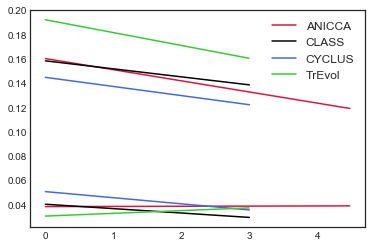

In [34]:
for code in codes:
    index_max = (np.where(M_FLM_BOC_FPu[code] == np.amax(M_FLM_BOC_FPu[code])))[0]
    plt.plot([0,PWR_CYCLE[code]], [M_FLM_BOC_FPu[code][index_max],M_FLM_EOC_FPu[code][index_max]], colors[code], label=code)
    plt.legend(loc='upper right',prop={'size': 12})


    index_min = (np.where(M_FLM_BOC_FPu[code] == np.amin(M_FLM_BOC_FPu[code])))[0]
    plt.plot([0,PWR_CYCLE[code]], [M_FLM_BOC_FPu[code][index_min],M_FLM_EOC_FPu[code][index_min]], colors[code])


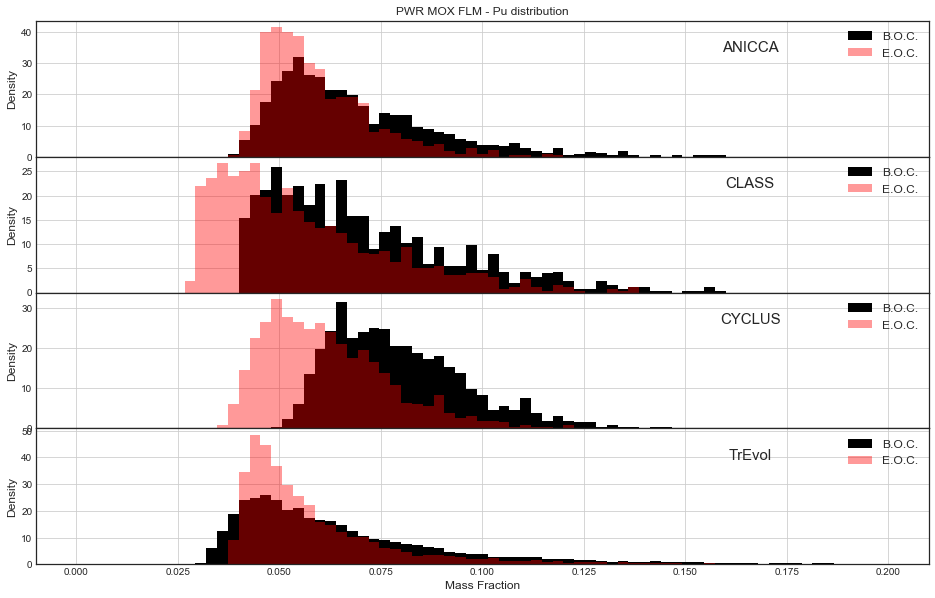

In [36]:
bins = [75, 75, 75, 75]

plot_pu(M_FLM_BOC_FPu, M_FLM_EOC_FPu, bins=bins, labels=codes, range=(0,0.20))

=> <span style="color:red"> Why ANICCA/TrEvol has so small Pu consumption....?? </span>

## 1.3 Mean value estimators

In [37]:
for code in codes:
    print_means_pu(code)

for code in codes:
    print_std_pu(code)

----------------------------------------
Mean value
----------------------------------------
----- ANICCA -----
FLM : 
Pu @BOC :  0.0685931  - Pu @EOC :  0.059098700000000004
FF : 
Pu @BOC :  0.0699621  - Pu @EOC :  0.0593405


----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
FLM : 
Pu @BOC :  0.07049648240255964  - Pu @EOC :  0.055953362129144854
FF : 
Pu @BOC :  0.07000000000000003  - Pu @EOC :  0.055125920302501456


----------------------------------------
Mean value
----------------------------------------
----- CYCLUS -----
FLM : 
Pu @BOC :  0.07940937971962646  - Pu @EOC :  0.06165874819625318
FF : 
Pu @BOC :  0.07806999999999999  - Pu @EOC :  0.060308749917782296


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
FLM : 
Pu @BOC :  0.06513092834223629  - Pu @EOC :  0.058175475367046404
FF : 
Pu @BOC :  0.06756308184683545  - Pu @EOC :  0.057677995219831225

<span style="color:red"> WTF?? ANICCA EOC Pu fraction is higher than BOC ??</span>

## 1.4 Plotting estimator 1

Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

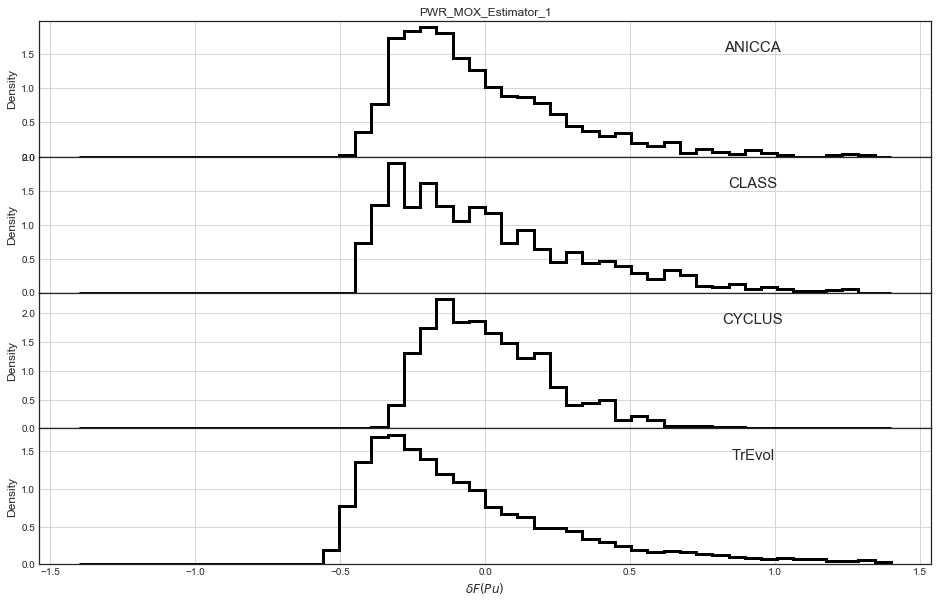

----------------------------------------
Mean value
----------------------------------------
----- ANICCA -----
estimator :  -0.0181665723976879


----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  0.007092605750851725


----------------------------------------
Mean value
----------------------------------------
----- CYCLUS -----
estimator :  0.01715613833260487


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.03423830498803117


----------------------------------------
Standard Deviation
----------------------------------------
----- ANICCA -----
estimator :  0.28834327408969757


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.33370831391142475


----------------------------------------
Standard Deviation
----------------------------------------
-

In [38]:
bins = [50, 50, 50, 50]
plot_estimator(ESTIMATOR_1, bins=bins, labels=codes, title_label='PWR_MOX_Estimator_1', x_label='$\delta F(Pu)$', y_label='Density',range=(-1.4,1.4))

for code in codes:
    print_means_estimator(code,ESTIMATOR_1)

for code in codes:
    print_std_estimator(code,ESTIMATOR_1)    

## 1.5 Plotting Estimator 2

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}}{\frac{\Delta M}{M}(Pu_i)_{FF}}$

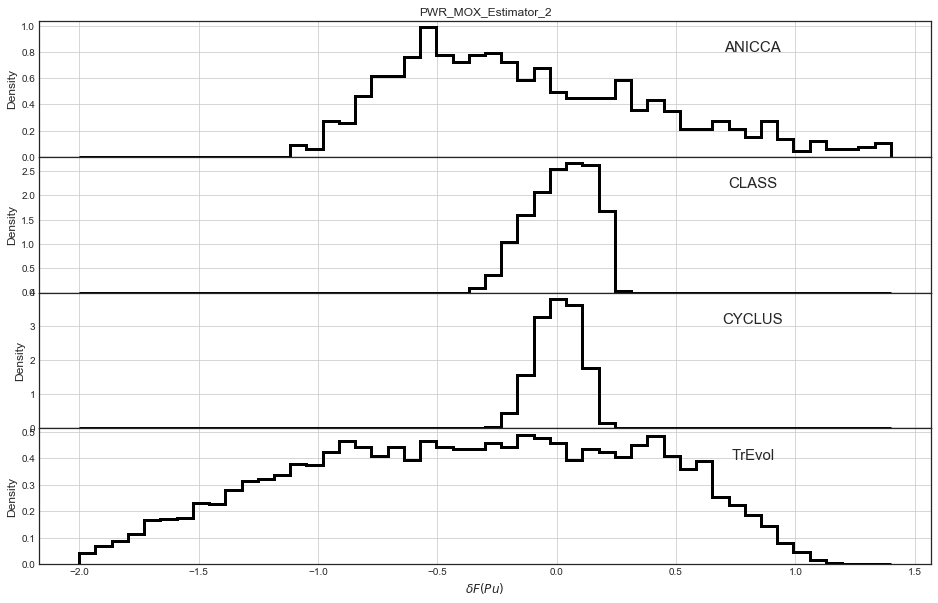

----------------------------------------
Mean value
----------------------------------------
----- ANICCA -----
estimator :  -0.08198937455454137


----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  0.019136891473184973


----------------------------------------
Mean value
----------------------------------------
----- CYCLUS -----
estimator :  0.004085908861234128


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.37427810970519626


----------------------------------------
Standard Deviation
----------------------------------------
----- ANICCA -----
estimator :  0.592838436319466


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.1283884071649739


----------------------------------------
Standard Deviation
----------------------------------------
--

In [39]:
bins = [50, 50, 50, 50]
plot_estimator(ESTIMATOR_2, bins=bins, labels=codes, title_label='PWR_MOX_Estimator_2', x_label='$\delta F(Pu)$', y_label='Density',range=(-2.0,1.4))

for code in codes:
    print_means_estimator(code,ESTIMATOR_2)

for code in codes:
    print_std_estimator(code,ESTIMATOR_2)    

## 1.5 Plotting Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

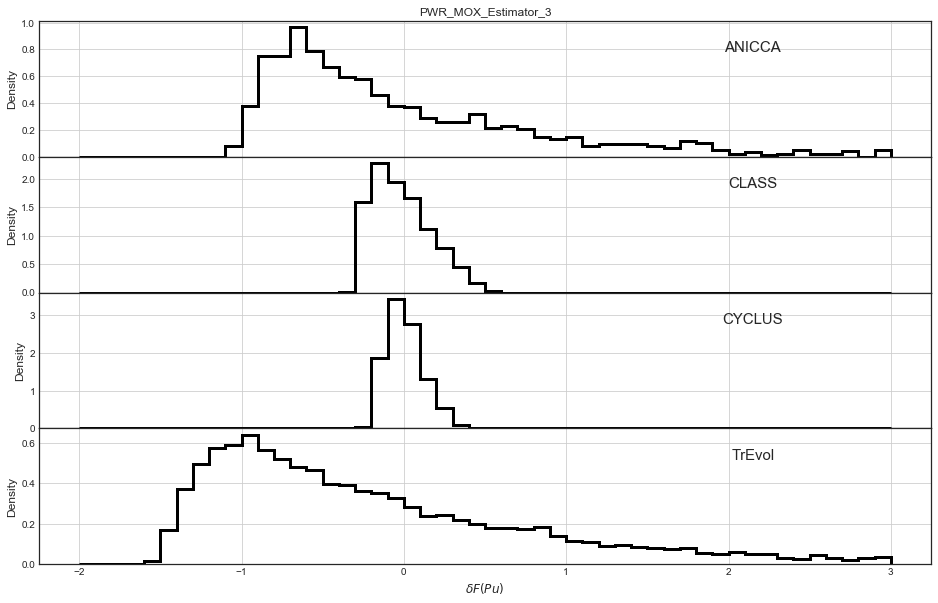

----------------------------------------
Mean value
----------------------------------------
----- ANICCA -----
estimator :  0.07040108364367227


----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  -0.015701764232112635


----------------------------------------
Mean value
----------------------------------------
----- CYCLUS -----
estimator :  0.003083003497693526


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.14445334673456878


----------------------------------------
Standard Deviation
----------------------------------------
----- ANICCA -----
estimator :  1.058467518592106


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.1801767516649943


----------------------------------------
Standard Deviation
----------------------------------------
--

In [40]:
bins = [50, 50, 50, 50]
plot_estimator(ESTIMATOR_3, bins=bins, labels=codes, title_label='PWR_MOX_Estimator_3', x_label='$\delta F(Pu)$', y_label='Density',range=(-2.0,3.0))

for code in codes:
    print_means_estimator(code,ESTIMATOR_3)

for code in codes:
    print_std_estimator(code,ESTIMATOR_3)    